# Latar Belakang
Airbnb listing Bangkok adalah perusahaan pihak ketiga yang membantu menemukan orang yang ingin menyewa tempat di bangkok dengan orang yang memiliki tempat untuk disewa. Selama ini perusahaan tidak memiliki data yang kuat untuk mempetakan daerah potential yang sering di pilih sebagai tempat tinggal sementara dan perilaku customer terhadap tempat yang disewakan (jumlah, harga, tipe, waktu).

# Permasalahan
Perusahaan ingin mengetahui bagaimana cara perusahaan dan host yang ada di bangkok untuk beradapatasi dan mengakomodasi peningkatan permintaan akan tempat menginap di tahun depan dan juga membantu mempetakan daerah yang memiliki jumlah listing yang besar. Informasi ini dapat membantu perusahaan airbnb listing bangkok dalam mengoptimalkan daerah lain yang belum banyak memiliki tempat untuk disewakan di airbnb dan juga membantu meratakan pertumbuhan ekonomi di daerah lain di bangkok.

Permasalahan yang ingin diangkat pada kasus ini adalah:

**Bagaimana Airbnb listing di bangkok berusaha beradaptasi dan mengakomodasi peningkatan permintaan akan tempat untuk menginap di tahun 2023 kedepan, sekaligus tetap menjaga keseimbangan pertumbuhan listing di semua daerah di bangkok?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# 1. Data Preprocessing

## Load the data 

In [2]:
df1 = pd.read_csv("Airbnb Listings Bangkok.csv", index_col=None)
df2 = pd.read_csv("Airbnb Listings Bangkok.csv", index_col=False)

In [3]:
df1 = df1.drop(columns=['Unnamed: 0'])
df1

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Data raw Airbnb Listings Bnagkok terdari 16 coloumn dan 15854 row
16 coloumn seperti:
- id : unique id tiap listing (property)
- name : nama user di aplikasi listing airbnb bangkok
- host_id : username/host yang menyewakan propertynya untuk digunain
- neighborhood : kabupaten/kota
- latitude : garis lintang
- longitude : garis lintang
- room_type : jenis kamar [entire place: 1 rumah/apt, private rooms: 1 ruangan di dalam sebuah rumah/apt, shared rooms: berada di ruangan yang sama dengan orang lain]
- price : harga sewa dalam mata uang thailand (bhat)
- minimum_nights : minimal waktu(malam) untuk menyewa
- number_of_reviews : jumlah review yang dimiliki listing
- last_review : tanggal terakhir listing di review
- review_per_month : jumlah rata-rata review listing per bulannya
- calculated_host_listings_count : jumlah review yang dimiliki host/penyewa di kota bangkok
- availability_365 : jumlah hari yang masih tersedia dalam 1 tahun kedepan
- number_of_reviews_ltm : jumlah review yang dimiliki listing dalam 12 bulan terakhir

# Data Understanding and Cleaning
## Checking Column Value
- bagaimana deskripsi dan info data yang dipakai?
- apakah semua column perlu atau penting?
- apakah ada anomaly dalam data/column?
- apakah datanya make sense?
- berapa banyak NaN atau nilai 0 yang tidak berarti yang dapat mengurangi nilai baris
- berapa banyak data yang terduplicate

In [4]:
df1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [5]:
df1.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

In [7]:
df1.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [8]:
df1.isnull().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [9]:
df1.describe(include='all')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,15846,1.585400e+04,15853,15854,15854.000000,15854.000000,15854,1.585400e+04,15854.000000,15854.000000,10064,10064.000000,15854.000000,15854.000000,15854.000000
unique,NaN,14794,NaN,5312,50,NaN,NaN,4,NaN,NaN,NaN,1669,NaN,NaN,NaN,NaN
top,NaN,New! La Chada Night Market studio 2PPL near MRT,NaN,Curry,Vadhana,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-12-11,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,228,2153,NaN,NaN,8912,NaN,NaN,NaN,189,NaN,NaN,NaN,NaN
mean,1.579397e+17,NaN,1.541058e+08,NaN,NaN,13.745144,100.559903,NaN,3.217704e+03,15.292355,16.654157,NaN,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,NaN,1.318726e+08,NaN,NaN,0.043040,0.050911,NaN,2.497212e+04,50.815020,40.613331,NaN,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,NaN,5.892000e+04,NaN,NaN,13.527300,100.329550,NaN,0.000000e+00,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,NaN,3.974431e+07,NaN,NaN,13.720090,100.529690,NaN,9.000000e+02,1.000000,0.000000,NaN,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,NaN,1.224556e+08,NaN,NaN,13.738490,100.561415,NaN,1.429000e+03,1.000000,2.000000,NaN,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,NaN,2.390547e+08,NaN,NaN,13.759497,100.585150,NaN,2.429000e+03,7.000000,13.000000,NaN,1.060000,13.000000,360.000000,3.000000


In [10]:
df1.shape

(15854, 16)

In [16]:
df1['minimum_nights'].unique()

array([   3,    1,   60,    7,  250,    2,   15,   30,   28,   21,   27,
          4,  180,   90,    5,  358, 1125,   29,   14,  200,  365,  120,
          9,   12,  300,  360,  100,   10,   45,   23,    6,   84,  370,
         24,   31,   50,   19,   20,   75,    8,   25,   40,   26,   59,
         58,  170,  399,  998,   13,   22,  356,   16,  183,  700,  150,
         35,  355,  500,   89,   80,   18,   11,   85,  135,  198,   88,
        160,  109,  148,   51, 1115,  113,   62,  450,  270,   55,  208,
       1000,   17,  999,  400,   99, 1095,   39,  190,  364])

In [17]:
df1[df1['minimum_nights']> 365]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year_last_review
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0,2021
324,2489610,NEW 65Sqm 2BD 2BR Sukhumvit26 Emquartier Emporium,12743033,Thanan,Khlong Toei,13.72699,100.56988,Entire home/apt,2043,370,23,2017-10-21,0.23,2,365,0,2017
1134,7625178,วิวล่า สิขลา,39999413,อัครพล,Vadhana,13.74159,100.57977,Private room,65000,399,0,0,NaN,1,365,0,0
1200,8801560,"30th floor, 10 min to BTS, Seaview",4517723,Kannicha,Bang Na,13.66417,100.64955,Entire home/apt,35000,998,20,2022-10-30,0.26,7,365,5,2022
1592,10709131,"34Fl 2, M Ladprao Condo,MRT & Malls",32398198,Touchapon,Chatu Chak,13.81699,100.56292,Entire home/apt,760,700,61,2019-08-25,0.73,2,364,0,2019
1833,12046101,Near BTS Onnut Convenience house,22676472,Kuan,Suanluang,13.71161,100.60344,Entire home/apt,1300,500,2,2016-07-30,0.02,3,363,0,2016
3694,19893829,2 Bedroom Suite@Kirthana Residence,64131143,Chetna,Vadhana,13.73917,100.56616,Entire home/apt,7286,500,0,0,NaN,3,48,0,0
4194,22059876,C,160989331,Annchalee,Thon buri,13.71693,100.48330,Private room,161516,500,3,2018-07-31,0.05,1,0,0,2018
7986,35165443,Wonderful apartment for you holiday in Thai,86991723,Yang,Bang Na,13.67260,100.60352,Entire home/apt,2000,1115,0,0,NaN,2,358,0,0
8608,37270784,นพกรณ์ แมนชั่น Noppakorn Mansion,271222372,Noppakorn,Lat Phrao,13.81852,100.59248,Entire home/apt,450,450,0,0,NaN,1,364,0,0


Ada data listing yang memiliki minimum night untuk di sewa lebih dari 365 tahun, karena tidak terlalu banyak mungkin dapat di sesuaikan dengan mengkategorikannya supaya lebih masuk akal

### Drop last_review & reviews_per_month column with checkpoint

In [18]:
df1d = df1.copy()

In [19]:
df1d = df1d.drop(columns=['reviews_per_month', 'last_review'])

### Drop Duplicate

In [20]:
df1d.duplicated().sum()

np.int64(0)

In [21]:
df1d.drop_duplicates() # JUST To Make Sure

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year_last_review
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2,353,0,2020
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,2,358,0,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,1,365,0,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,1,323,1,2022
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,3,365,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,1,362,0,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,14,365,0,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,14,365,0,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,14,365,0,0


In [22]:
df1d['name'].duplicated().sum()

np.int64(1059)

same name still possible for agent or hotel company and same host_id is still also make sense 

In [23]:
df1d['id'].duplicated().sum()

np.int64(0)

wow no duplicate so far

In [24]:
df1d[df1d['price']< 300]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year_last_review
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.738150,100.564200,Hotel room,0,1,0,1,0,0,0
15401,772815799000677300,Mixed Dorm 10 Bunkbed at Amazing khaosan Hostel 2,488818866,Thanet,Phra Nakhon,13.762439,100.503922,Shared room,280,1,0,12,356,0,0
15455,776042168224443103,1 Upper-Bunk Bed /w Shared Bath,219048748,Kay,Suanluang,13.712770,100.606230,Shared room,280,1,0,7,365,0,0
15456,776071884102373052,1 Lower-Bunk Bed /w Shared Bath,219048748,Kay,Suanluang,13.711320,100.605730,Shared room,280,1,0,7,365,0,0
15473,780103082979427963,Flourish Capsule Hostel,491129139,Chirapat,Bang Rak,13.732114,100.526675,Shared room,295,1,1,1,176,1,2022
15551,781516205530971982,Artist Private AirRoom 10min2SkytrainPetFriendly,11346360,Upside,Phasi Charoen,13.695918,100.432468,Private room,278,1,0,2,345,0,0


this is anomaly that can be drop because there is no way people can get a hotel room free, but with price of 270 onward for shared room based on my research its make sense with lowest standard hostel

In [25]:
df1d = df1d[df1d['id'] != 44563108]

because only 1 row specific

In [26]:
df1d[df1d['price']< 300]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year_last_review
15401,772815799000677300,Mixed Dorm 10 Bunkbed at Amazing khaosan Hostel 2,488818866,Thanet,Phra Nakhon,13.762439,100.503922,Shared room,280,1,0,12,356,0,0
15455,776042168224443103,1 Upper-Bunk Bed /w Shared Bath,219048748,Kay,Suanluang,13.712770,100.606230,Shared room,280,1,0,7,365,0,0
15456,776071884102373052,1 Lower-Bunk Bed /w Shared Bath,219048748,Kay,Suanluang,13.711320,100.605730,Shared room,280,1,0,7,365,0,0
15473,780103082979427963,Flourish Capsule Hostel,491129139,Chirapat,Bang Rak,13.732114,100.526675,Shared room,295,1,1,1,176,1,2022
15551,781516205530971982,Artist Private AirRoom 10min2SkytrainPetFriendly,11346360,Upside,Phasi Charoen,13.695918,100.432468,Private room,278,1,0,2,345,0,0


In [27]:
df1d[df1d['availability_365'] < 365]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year_last_review
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2,353,0,2020
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,2,358,0,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,1,323,1,2022
9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.720400,100.507570,Private room,700,2,4,10,87,0,2019
10,55681,Sathorn Terrace Apartment(61),263049,Tor,Bang Rak,13.719340,100.517600,Private room,1150,2,27,7,320,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15839,790404714116491557,Ratchada Condo next To MRT,34432625,Alex,Huai Khwang,13.763732,100.569455,Entire home/apt,2100,28,0,2,332,0,0
15840,790441848994752308,Sukhumvit Condo Next to BTS,34432625,Alex,Bang Na,13.665395,100.603951,Entire home/apt,1400,28,0,2,364,0,0
15843,790458045665867830,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.754421,100.538842,Private room,1529,1,0,14,363,0,0
15848,790460476887978054,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.752904,100.540381,Private room,1400,1,0,14,357,0,0


many of data that not addup 365 in availability_365 + calculated_host_listings_count cant be necessarily wrong input/anomaly cause based on the community guideline of airbnb, the host can block the listings date, so the listings not always available 365 days

In [29]:
df1d[df1d['number_of_reviews_ltm'] > df1d['number_of_reviews']]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year_last_review


no anomaly detected to see if any hickups when number_of_reviews_ltm bigger than overall number of reviews throught out many years

In [30]:
df1d[df1d['price'] > 100000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year_last_review
17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,6,180,0,2020
1239,8880974,"Modern,wifi,5m MRT&2 Shopping Mall",30803267,Yasmine,Huai Khwang,13.759950,100.569360,Entire home/apt,1000000,100,45,4,180,0,2016
1779,11579635,"2 Bedroom,wifi,5mMRT&Shopping Mall",30803267,Yasmine,Huai Khwang,13.754710,100.565980,Entire home/apt,1000000,100,53,4,249,0,2018
1850,12056763,Charoenkrung Road House/Office Rent,62898498,Charlie,Bang Rak,13.727880,100.518720,Entire home/apt,300000,365,0,1,365,0,0
1986,13033135,Airport-MRT-ShowShopFood-FullFN,34158729,Chayakorn,Din Daeng,13.784330,100.570660,Private room,300000,120,0,1,358,0,0
2507,15380964,"Resort Style Luxury apartment,5min to MRT,free...",30803267,Yasmine,Huai Khwang,13.758770,100.569430,Entire home/apt,100686,1,40,4,180,0,2019
2568,16045517,"BTS Wongwianyai, Rooftop Pool, Wifi",94426146,Wanlapatch,Khlong San,13.721550,100.495170,Entire home/apt,160000,3,20,1,179,0,2018
2668,16139502,Nice Check-in My Hostel (Private 2 beds),51074483,Nuttawut,Ratchathewi,13.751130,100.527310,Hotel room,300000,1,2,5,365,0,2020
4194,22059876,C,160989331,Annchalee,Thon buri,13.716930,100.483300,Private room,161516,500,3,1,0,0,2018
4373,22633450,rm 1 : cozy & comfy,117057915,Jeab,Bang Phlat,13.791630,100.490380,Private room,600700,1,9,5,330,0,2020


In [31]:
real_iqr_price = df1d['price'].describe()['75%'] - df1d['price'].describe()['25%']
lower_bound = df1d['price'].describe()['25%'] - 1.5*real_iqr_price
upper_bound = df1d['price'].describe()['75%'] + 1.5*real_iqr_price
print(lower_bound, upper_bound)

-1393.5 4722.5


In [32]:
outlier_upper = df1d[(df1d['price'] > upper_bound)]
outlier_upper

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year_last_review
17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,6,180,0,2020
18,105042,Central Bangkok 3 Bedroom Apartment,545890,Henry,Khlong Toei,13.733780,100.563030,Entire home/apt,5680,28,148,1,334,0,2020
19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,1,349,3,2022
34,978531,Urban Oasis in the heart of Bangkok,5309669,Apiradee,Sathon,13.722910,100.537590,Entire home/apt,5429,2,3,3,174,0,2018
48,185364,Beautiful Wood Bangkok Resort House,889670,Narumon,Nong Chok,13.779000,100.836710,Entire home/apt,8658,1,0,1,363,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15756,786741911434733026,Private Home for 12-16 Guests 8 Parking,435016000,Tadchon,Lat Phrao,13.827958,100.591895,Entire home/apt,17900,2,0,10,362,0,0
15757,786742271004207966,Private Hotel for 12-16 Guests,435016000,Tadchon,Chatu Chak,13.821809,100.563067,Private room,17900,2,0,10,362,0,0
15765,786834873763460489,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.735632,100.567862,Entire home/apt,7589,1,0,44,364,0,0
15766,786852847114140309,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.734753,100.566682,Entire home/apt,7589,1,0,44,364,0,0


In [33]:
len(outlier_upper) / len(df1d) *100

8.85005992556614

based on calculation, there are 1403 row of outlier data in terms of price and that as big as 8.85% of total rows and i think that still make sense to just drop those rows with this argument

In [34]:
df1d = df1d[(df1d['price'] < upper_bound)]
df1d

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year_last_review
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2,353,0,2020
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,2,358,0,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,1,365,0,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,1,323,1,2022
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,3,365,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,1,362,0,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,14,365,0,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,14,365,0,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,14,365,0,0


tersisa 14450 row setelah dropping 1403 outlier

In [35]:
df1d['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Sai Mai',
       'Vadhana', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Phra Khanong',
       'Thawi Watthana', 'Parthum Wan', 'Pra Wet', 'Thon buri',
       'Yan na wa', 'Suanluang', 'Don Mueang', 'Dusit', 'Lak Si',
       'Phra Nakhon', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Nong Chok', 'Saphan Sung', 'Min Buri', 'Khan Na Yao',
       'Khlong Sam Wa', 'Bang Khen', 'Lat Phrao', 'Chom Thong',
       'Bangkok Noi', 'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru',
       'Bang Khae', 'Bang Khun thain', 'Taling Chan', 'Bang Bon'],
      dtype=object)

all of those are valid in bangkok

In [40]:
df1d['occupancy_days'] = df1d['minimum_nights'] * df1d['number_of_reviews']

kolom occupancy_days ini dibuat sebagai anggapan total occuapancy dari tahun tahun sebelumnya (2012-2021). <-- tahun tau dari occupancynya ada yang sampai 3650 yang berarti data ini sudah di ada dari 10-11 tahun yang lalu (last_review ada di tahun 2022 sebelum di drop). cross check lewat google dan memang airbnb listing bangkok sudah ada dari tahun 2012

In [41]:
def categorize_stay(minimum_nights):
    if minimum_nights <= 6:
        return "Short"
    elif minimum_nights <= 29:
        return "Medium"
    elif minimum_nights <= 90:
        return "Long"
    else:
        return "Extended"

In [42]:
df1d['category_stay'] = df1d['minimum_nights'].apply(categorize_stay)

and to make the minumum_nights more easy to understand, i just categorized into 4 category
- minimum nights with no more than 6 days can be said as short stay or short vacation
- medium stay with more than 6 days but no more than 1 month stay
- long stay can be categorized as long vacation to refresh their life. 
- extended stay is the ultimate stay that mostly popular for college student, intern, people who move because of job requirement and people with similar situation

so, minimum nights with more than 3 month is not necessarily rare and that data cannot be anomaly or wrong input in this case

In [43]:
df1d.isna().sum()

id                                0
name                              7
host_id                           0
host_name                         1
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
year_last_review                  0
occupancy_days                    0
category_stay                     0
dtype: int64

In [45]:
df1d.query("availability_365 > 365")

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year_last_review,occupancy_days,category_stay


In [46]:
df1d.isna().sum()

id                                0
name                              7
host_id                           0
host_name                         1
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
year_last_review                  0
occupancy_days                    0
category_stay                     0
dtype: int64

In [47]:
len(df1d)

14450

mini checkpoint

In [48]:
df1e = df1d.copy()

In [49]:
df1e = df1e.dropna(subset=['name', 'host_name'])

In [50]:
len(df1e)

14442

In [51]:
df1e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14442 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14442 non-null  int64  
 1   name                            14442 non-null  object 
 2   host_id                         14442 non-null  int64  
 3   host_name                       14442 non-null  object 
 4   neighbourhood                   14442 non-null  object 
 5   latitude                        14442 non-null  float64
 6   longitude                       14442 non-null  float64
 7   room_type                       14442 non-null  object 
 8   price                           14442 non-null  int64  
 9   minimum_nights                  14442 non-null  int64  
 10  number_of_reviews               14442 non-null  int64  
 11  calculated_host_listings_count  14442 non-null  int64  
 12  availability_365                14442

In [52]:
df1e.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
year_last_review                  0
occupancy_days                    0
category_stay                     0
dtype: int64

In [53]:
df1e['booked_365'] = 365 - df1e['availability_365']
df1e

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year_last_review,occupancy_days,category_stay,booked_365
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2,353,0,2020,195,Short,12
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,2,358,0,0,0,Short,7
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,1,365,0,0,0,Long,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,1,323,1,2022,14,Medium,42
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,3,365,0,0,0,Short,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,1,362,0,0,0,Medium,3
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,14,365,0,0,0,Short,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,14,365,0,0,0,Short,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,14,365,0,0,0,Short,0


In [54]:
df1e[(df1e['minimum_nights'] > df1e['booked_365']) &(df1e['booked_365'] > 0)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year_last_review,occupancy_days,category_stay,booked_365
11,1765918,2BR apt in a cozy neighborhood,9279712,Jing,Phaya Thai,13.774860,100.542720,Entire home/apt,1893,15,129,1,356,1,2022,1935,Medium,9
22,965722,Siamese Gioia on Sukhumvit 31,5265861,Chuchart,Vadhana,13.744440,100.570030,Private room,3775,30,3,1,364,0,2018,90,Long,1
24,118118,Pan Dao Condo 5 min from BTS On Nut,596463,Dustin,Khlong Toei,13.704410,100.599680,Entire home/apt,1732,2,3,1,364,0,2013,6,Short,1
42,985743,Room with city view of BKK,5309669,Apiradee,Sathon,13.718030,100.546540,Private room,3500,3,0,3,363,0,0,0,Short,2
60,1898332,"Apr. for rent full fur 1 bedroom, monthly",4837310,Veesa,Bang Na,13.678050,100.624510,Private room,400,180,0,1,364,0,0,0,Extended,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15798,788897722497895498,市中心现代两房,133849226,Aidan,Ratchathewi,13.750811,100.556600,Entire home/apt,1548,30,0,20,361,0,0,0,Long,4
15806,789484901156712444,"50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym",472715937,Kotcharat,Bang Sue,13.828505,100.527433,Entire home/apt,560,12,0,8,363,0,0,0,Medium,2
15833,790283533781929861,iSanook Suite 34 sqm 8,8663142,ISanook Hotel,Bang Rak,13.733555,100.522394,Private room,1900,30,0,45,363,0,0,0,Long,2
15840,790441848994752308,Sukhumvit Condo Next to BTS,34432625,Alex,Bang Na,13.665395,100.603951,Entire home/apt,1400,28,0,2,364,0,0,0,Medium,1


this cannot be categorized as anomaly or bad data because in the dictionary/airbnb listings the host can block date so the customer cannot book that date

In [59]:
df1e.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
year_last_review                  0
occupancy_days                    0
category_stay                     0
booked_365                        0
dtype: int64

no NaN anymore

In [60]:
df1e.to_csv('Airbnb_Listings_Bangkok_Clean2.csv')

## Data Analysis
Data akan dianalisis akan dibagi menjadi Supply Analysis, Demand Analysis, dan juga summary

## Supply Analysis
- Treemap `Category Stay` in 2022 based on `Possible days` to book
- Bar Chart `Room Type` Distribution based on `Possible days` to book
- Pareto Chart `Neighbourhood` Domination based on `Possible days` to book
- KPI section:
- Lowest and Highest `average mean price` of `Neighbourhood`
- `Maximum Possible days` in 2022
- Top Host with most `Listings` in Bangkok

In [ ]:
import plotly.express as px

In [ ]:
df1f = df1e[['id', 'host_id', 'neighbourhood', 'room_type', 'category_stay', 'availability_365', 'booked_365']]
df1f['possible_days'] = df1f['availability_365'] + df1f['booked_365']

C:\Users\Ivan\AppData\Local\Temp\ipykernel_26232\2594110189.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Treemap `Category Stay` in 2022 based on `Possible days` to book

In [ ]:
#grouping dulu
df_grouped_by_possibledays = df1f.groupby("category_stay", as_index=False)["possible_days"].sum()

In [ ]:
# treemap
fig = px.treemap(df_grouped_by_possibledays, 
                 path=['category_stay'], 
                 values='possible_days', 
                 title="Supply: Category Stay by Possible booked days in Year 2022",
                 color='possible_days',
                 color_continuous_scale='Teal'
                 )
fig.show()

dari visualisasi treemap, dapat dikatakan bahwa 
- `short stay` mendominasi dari segi `category stay` dengan total 3.8 Million possible booked days.
- disusul dengan `medium stay`, `long stay`, dan yang terakhir adalah `extended stay`.
- dominasi `short stay` ini sangat membantu customer untuk memilih tempat karena secara minimum nights mereka tidak terlalu pusing dan punya banyak pilihan.
- di tahun 2022 sendiri, host mungkin juga sudah mengerti kalau banyak orang yang sudah ingin vacation tetapi tetap hanya beberapa hari untuk menghindari covid-19.
- selain itu karena tourist rebound ini banyak juga yang menjual tempat untuk disewa dengan `minimum night` sedikit.
- `extended stay` tidak terlalu banyak karena bangkok bukan kota pelajar dimana banyak mahasiswa yang datang ke bangkok untuk belajar di perguruan tinggi tetapi tetap cukup untuk orang orang yang mencoba merantau atau pendatang yang pindah pekerjaan/intern


### Bar Chart `Room Type` Distribution based on `Possible days` to book

In [105]:
df1f = df1e[['id', 'host_id', 'neighbourhood', 'room_type', 'category_stay', 'availability_365', 'booked_365']]
df1f['possible_days'] = df1f['availability_365'] + df1f['booked_365']

C:\Users\Ivan\AppData\Local\Temp\ipykernel_26232\2594110189.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



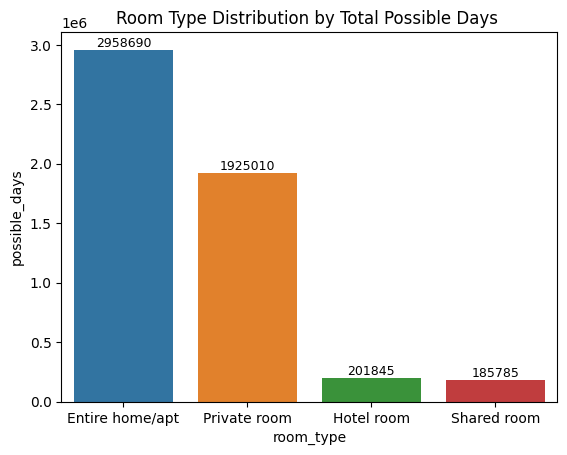

In [ ]:
#bar plot
bar = sns.barplot(data= df1f, 
            x = 'room_type', 
            y= 'possible_days',
            hue= 'room_type',
            estimator = np.sum
            )
plt.title('Room Type Distribution by Total Possible Days to book')

#annotate
for p in bar.patches:
    bar.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')
plt.show()

Visualisasi dari distribusi room type ini menggambarkan bahwa:
- `entire hoom/apt` menjadi pilihan paling diminati host untuk disewakan dibandingkan dipisah menjadi `private room/shared room` dengan total possible days hampir `3 Million days`.
- `private room` menduduki posisi kedua dengan `hampir 2 Million possible days` to book melihat ada juga kategori customer yang datang sendiri/tidak banyak dan hanya ingin menyewa 1 ruangan saja untuk menghemat uang.
- `hotel room` disini tidak memiliki banyak possible days to book karena dari hotelnya sendiri hanya memberikan beberapa persen dari total ruangan hotel yang dapat disewa melalui airbnb bangkok. Kemungkinan juga ada aplikasi lain yang menjual secara spesifik hotel room atau bahkan dari hotelnya sendiri masih merasa menjual secara konvensional lebih menguntungkan dengan tidakadanya percentage cut dari aplikasi pihak ketiga.
- `shared room` tidak terlalu disukai host untuk disewa karena sudah `terbiasa menyewakan 1 ruangan langsung ataupun 1 rumah`. banyak juga tantangan untuk menyewakan shared room di bangkok seperti kurangnya privasi untuk customer melakukan aktivitas di dalam kamar.


### Pareto Chart: `Neighbourhood` Domination based on `Possible Days` to book

In [ ]:
#grouiping neighbourhood dari possible days
df_possibledays_by_neigh = (
    df1f.groupby("neighbourhood", as_index=False)["possible_days"]
        .sum()
        .sort_values(by="possible_days", ascending=False)
        .reset_index(drop=True)
)

In [ ]:
#pembuatan cumulativesum sama percentage buat line chartnya
df_possibledays_by_neigh['cumulativesum'] = df_possibledays_by_neigh['possible_days'].cumsum()
df_possibledays_by_neigh['cumulativepercentage'] = 100 * df_possibledays_by_neigh['cumulativesum'] / df_possibledays_by_neigh['possible_days'].sum()

In [116]:
df_possibledays_by_neigh

,neighbourhood,possible_days,cumulativesum,cumulativepercentage
0,Khlong Toei,688390,688390,13.059133
1,Vadhana,645320,1333710,25.301205
2,Ratchathewi,386170,1719880,32.627060
3,Huai Khwang,376315,2096195,39.765960
4,Sathon,278130,2374325,45.042238
5,Bang Rak,269370,2643695,50.152333
6,Phra Nakhon,213525,2857220,54.203019
7,Phra Khanong,196735,3053955,57.935189
8,Chatu Chak,190530,3244485,61.549647
9,Bang Na,156585,3401070,64.520150


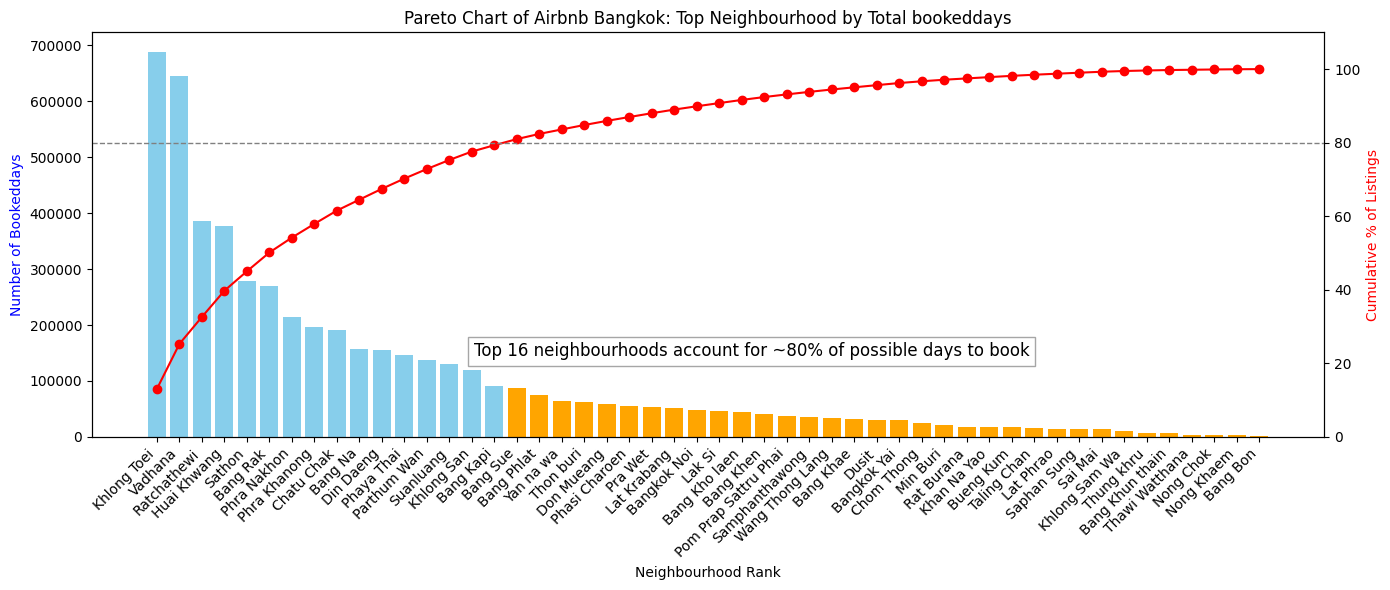

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,6))

colors = ["skyblue" if p <= 80 else "orange" for p in df_possibledays_by_neigh["cumulativepercentage"]]

# Bar plot
ax1.bar(df_possibledays_by_neigh.index, df_possibledays_by_neigh["possible_days"], color=colors)
ax1.set_ylabel("Number of Bookeddays", color="blue")
ax1.set_xlabel("Neighbourhood Rank")

# label neighbourhood
ax1.set_xticks(df_possibledays_by_neigh.index)
ax1.set_xticklabels(df_possibledays_by_neigh["neighbourhood"], rotation=45, ha="right")

# Line plot
ax2 = ax1.twinx()
ax2.plot(df_possibledays_by_neigh.index, df_possibledays_by_neigh["cumulativepercentage"], color="red", marker="o", linestyle="-")
ax2.set_ylabel("Cumulative % of Listings", color="red")
ax2.axhline(80, color="gray", linestyle="--", linewidth=1)  # 80% reference line
ax2.set_ylim(0, 110)

#top neighbourhood biar bisa diganti di demand juga
n_dominant = (df_possibledays_by_neigh["cumulativepercentage"] <= 80).sum()
textstr = f"Top {n_dominant} neighbourhoods account for ~80% of possible days to book"

#text placement
ax1.text(
    0.31, 0.2, textstr,
    transform=ax1.transAxes,
    fontsize=12,
    color="black",
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="gray")
)

plt.title("Pareto Chart of Airbnb Bangkok: Top Neighbourhood by Total Possible days to book")
plt.tight_layout()
plt.show()

Dari visualisasi ini dapat di simpulkan bahwa:

- `Top 16 dari neighbourhood` berdasarkan jumlah possible days to book `mendominasi 80% dari total jumlah possible days` to book yang ada di bangkok.
- Top 2nya yaitu neighbourhood `Khlong Toei` dan `Vadhana` memiliki `lebih 600K possible days` to book karena mereka memiliki banyak listing.
- banyak `neighbourhood` yang `under-penetrated` dari segi hari yang bisa di booking.

- KPI section:
- Lowest and Highest `average mean price` of `Neighbourhood`
- `Maximum Possible days` in 2022
- Top Host with most `Listings` in Bangkok

In [133]:
meangroup = df1e.groupby("neighbourhood")["price"].mean()
meangroup.min()
meangroup.max()
possiblegroup = df1f['possible_days'].sum()
tophost = df1e.groupby("host_name", as_index=False)['id'].count().sort_values(by="id", ascending=False).head(1)
print(f'''
      lowest average price in bangkok: {meangroup.min()}, 
      highest average price in bangkok: {meangroup.max()}, 
      Total Possible days to book: {possiblegroup}, 
      Top Host with highest number of listing in bangkok: {tophost['host_name'].iloc[0]}''')


      lowest average price in bangkok: 1033.7291666666667, 
      highest average price in bangkok: 2179.3643617021276, 
      Total Possible days to book: 5271330, 
      Top Host with highest number of listing in bangkok: Curry


## Demand Analysis
- Treemap `Category Stay` in 2022 based on `booked_365` days 
- Bar Chart `Room Type` Distribution based on `booked_365` days 
- Pareto Chart `Neighbourhood` Domination based on `booked_365` days 
- KPI section:
- Revenue in 2022
- `Total Booked days` in 2022
- Most Popular `Room Type` in 2022 for customer to choose
- Most Popular `Category Stay` in 2022 for customer to choose

In [80]:
df1e['availability_365'].value_counts()

availability_365
365    2096
0       759
364     599
180     403
90      311
       ... 
189       2
183       2
193       1
197       1
192       1
Name: count, Length: 366, dtype: int64

### Treemap `Category Stay` in 2022 based on `booked_365` days 

In [108]:
df_groupedcategorystay_by_book = df1e.groupby("category_stay", as_index=False)["booked_365"].sum()

In [109]:
fig = px.treemap(df_groupedcategorystay_by_book, 
                 path=['category_stay'], 
                 values='booked_365', 
                 title="Demand: Category Stay by Occupancy in Year 2022",
                 color='booked_365',
                 color_continuous_scale='Teal'
                 )
fig.show()

dari visualisasi treemap, dapat dikatakan bahwa 
- `short stay` mendominasi dari segi `category stay` dengan total 1.2 Million booked days di 2022.
- disusul dengan `medium stay`, `long stay`, dan yang terakhir adalah `extended stay`.
- sama dengan possible days treemap sebelumnya, ada dominasi `short stay` karena minimum nights yang sedikit sangat diminati customer, dimana mereka tidak terlalu pusing untuk mengatur jadwal dan punya banyak pilihan.
- tourist rebound di tahun 2022 membuat banyak customer yang memilih tempat dengan `minimum night` sedikit.
- `extended stay` tidak terlalu banyak diminati customer di 2022 karena tetap ada cukup untuk orang orang yang mencoba merantau atau pendatang yang pindah pekerjaan/intern atau bahkan mahasiswa.


### Bar Chart `Room Type` Distribution based on `booked_365` days 

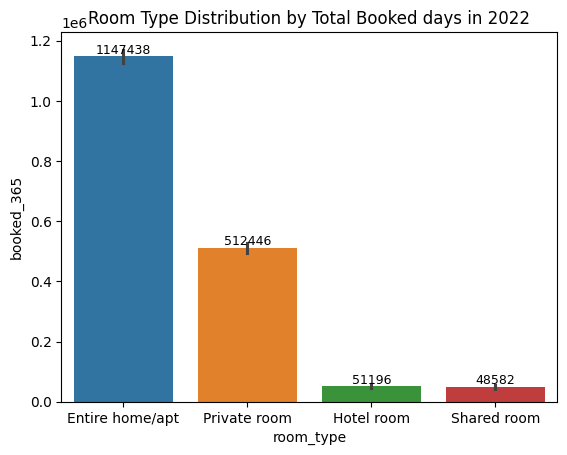

In [124]:
bar = sns.barplot(data= df1f, 
            x = 'room_type', 
            y= 'booked_365',
            hue= 'room_type',
            estimator = np.sum, 
            )
plt.title('Room Type Distribution by Total Booked days in 2022')

for p in bar.patches:
    bar.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')
plt.show()

Visualisasi dari distribusi room type ini menggambarkan bahwa:
- `entire hoom/apt` menjadi pilihan paling diminati customer juga dibandingkan dengan `private room/shared room` dengan total booked days hampir `1.1 Million days` di tahun 2022.
- `private room` menduduki posisi kedua dengan `500K booked days` melihat ada juga kategori customer yang datang sendiri/tidak banyak dan hanya ingin menyewa 1 ruangan saja untuk menghemat uang.
- `hotel room` hanya di terbooking 51K days karena customer mungkin tidak menggunakan airbnb untuk booking hotel di bangkok atau mungkin persaingan harga yang cukup kompetitif tanpa airbnb juga menjadi faktor kurang diminatinya room type ini.
- `shared room` tidak terlalu disukai karena kurangnya privasi untuk customer melakukan aktivitas di dalam kamar.


### Pareto Chart: `Neighbourhood` Domination based on `booked_365` days

In [88]:
df_sumbook_by_neigh = (
    df1e.groupby("neighbourhood", as_index=False)["booked_365"]
        .sum()
        .sort_values(by="booked_365", ascending=False)
        .reset_index(drop=True)
)

In [89]:
df_sumbook_by_neigh['cumulativesum'] = df_sumbook_by_neigh['booked_365'].cumsum()
df_sumbook_by_neigh['cumulativepercentage'] = 100 * df_sumbook_by_neigh['cumulativesum'] / df_sumbook_by_neigh['booked_365'].sum()

In [90]:
df_sumbook_by_neigh

,neighbourhood,booked_365,cumulativesum,cumulativepercentage
0,Khlong Toei,259017,259017,14.719702
1,Vadhana,249905,508922,28.921577
2,Huai Khwang,168249,677171,38.483015
3,Ratchathewi,112724,789895,44.889018
4,Bang Rak,86854,876749,49.824853
5,Sathon,77015,953764,54.201546
6,Phra Khanong,70590,1024354,58.213111
7,Chatu Chak,59916,1084270,61.618083
8,Phra Nakhon,56960,1141230,64.855069
9,Bang Na,51731,1192961,67.794895


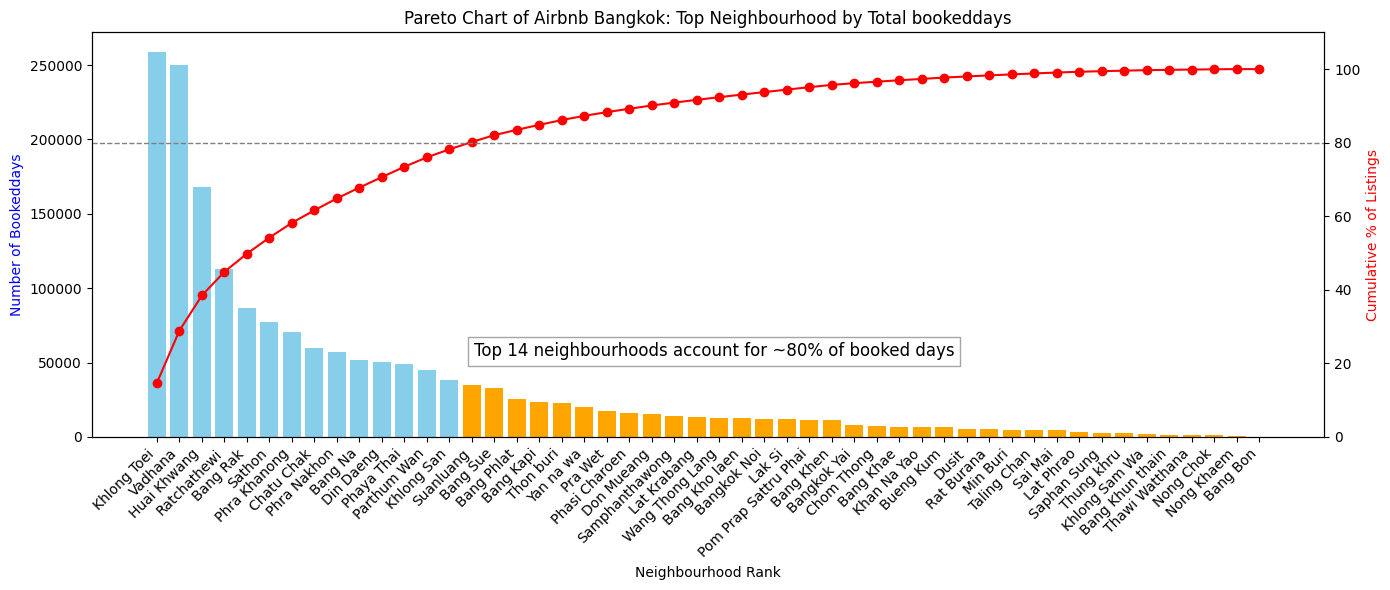

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,6))

colors = ["skyblue" if p <= 80 else "orange" for p in df_sumbook_by_neigh["cumulativepercentage"]]

# Bar plot (listings count per host)
ax1.bar(df_sumbook_by_neigh.index, df_sumbook_by_neigh["booked_365"], color=colors)
ax1.set_ylabel("Number of Bookeddays", color="blue")
ax1.set_xlabel("Neighbourhood Rank")

# X-ticks as host IDs or names
ax1.set_xticks(df_sumbook_by_neigh.index)
ax1.set_xticklabels(df_sumbook_by_neigh["neighbourhood"], rotation=45, ha="right")

# Line plot for cumulative %
ax2 = ax1.twinx()
ax2.plot(df_sumbook_by_neigh.index, df_sumbook_by_neigh["cumulativepercentage"], color="red", marker="o", linestyle="-")
ax2.set_ylabel("Cumulative % of Listings", color="red")
ax2.axhline(80, color="gray", linestyle="--", linewidth=1)  # 80% reference line
ax2.set_ylim(0, 110)

n_dominant = (df_sumbook_by_neigh["cumulativepercentage"] <= 80).sum()
textstr = f"Top {n_dominant} neighbourhoods account for ~80% of booked days"

# Place text on the figure
ax1.text(
    0.31, 0.2, textstr,
    transform=ax1.transAxes,
    fontsize=12,
    color="black",
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="gray")
)

plt.title("Pareto Chart of Airbnb Bangkok: Top Neighbourhood by Total booked days")
plt.tight_layout()
plt.show()

Dari visualisasi ini dapat di simpulkan bahwa:

- `Top 14 dari neighbourhood` berdasarkan jumlah booked days di 2022 `mendominasi 80% dari total booked days` di bangkok.
- Top 2nya yaitu neighbourhood `Khlong Toei` dan `Vadhana` yang memiliki `lebih 600K possible days` to book juga menjadi top2 disini yang berarti semakin banyak listing di daerah tersebut semakin banyak kemungkinan neighbour tersebut dipilih customer.
- banyak `neighbourhood` yang `under-penetrated` juga mempengaruhi booked days disini.

- KPI section:
- Revenue in 2022
- `Total Booked days` in 2022
- Most Popular `Room Type` in 2022 for customer to choose
- Most Popular `Category Stay` in 2022 for customer to choose

In [136]:
df1g = df1e[['booked_365', 'price']]
df1g['revenue'] = df1g['booked_365'] * df1g['price']
df1g['revenue'].sum()
df1g['booked_365'].sum()
popularroom = df1e.groupby('room_type', as_index=False)['booked_365'].sum().sort_values(by='booked_365', ascending=False).head(1)
popularstay = df1e.groupby('category_stay', as_index=False)['booked_365'].sum().sort_values(by='booked_365', ascending=False).head(1)
print(f'''
      Revenue Airbnb Bangkok in 2022: {df1g['revenue'].sum()}, 
      Total Booked days in 2022: {df1g['booked_365'].sum()}, 
      Most Popular room type based on customer book: {popularroom['room_type'].iloc[0]}, 
      Most Popular category stay based on customer book: {popularstay['category_stay'].iloc[0]}''')


      Revenue Airbnb Bangkok in 2022: 2785647102, 
      Total Booked days in 2022: 1759662, 
      Most Popular room type based on customer book: Entire home/apt, 
      Most Popular category stay based on customer book: Short


C:\Users\Ivan\AppData\Local\Temp\ipykernel_26232\512226457.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Summary 
- Bar Chart Comparison `booked days` in 2022 and from `2012-2021` based on `Category stay` and `Room Type`
- KPI section:
- Total `Revenue` all years
- `Revenue` each year from 2012-2021
- Total `Unique Listings`
- Total `Unique Host`

### Bar Chart Occupancy comparison between Year 2012-2021 and 2022 by Room Type

In [146]:
df_grouptwinroom = df1e.groupby('room_type')[['booked_365', 'occupancy_days']].sum().reset_index()

In [147]:
meltedroom = df_grouptwinroom.melt(id_vars='room_type',
                               value_vars=['booked_365', 'occupancy_days'],
                               var_name = 'year_group'
                               )

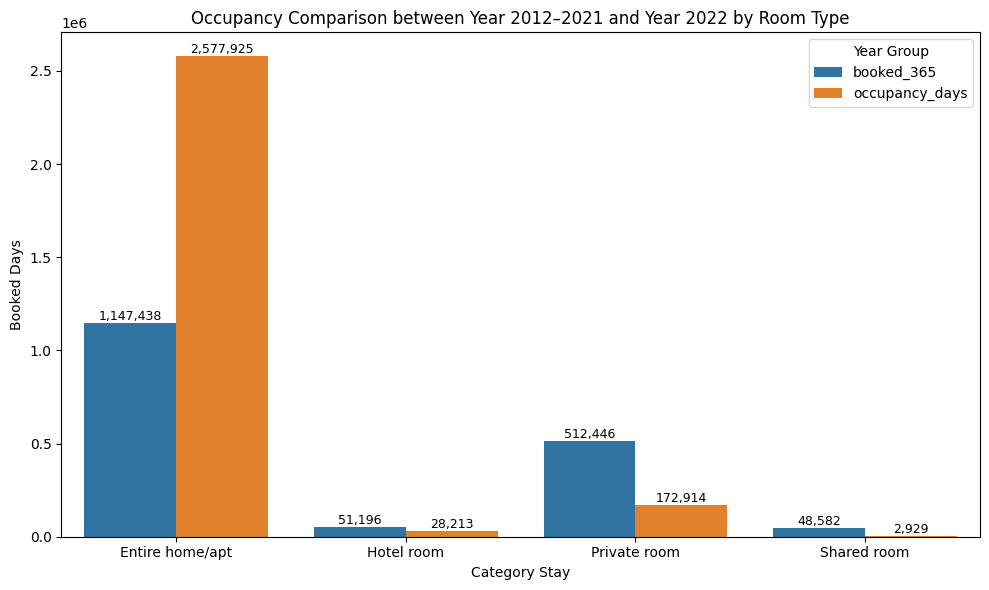

In [148]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=meltedroom,
    x="room_type",
    y="value",
    hue="year_group",
)
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # avoid 0-height annotations
        plt.gca().annotate(
            f"{int(height):,}",
            (p.get_x() + p.get_width()/2., height),
            ha="center", va="bottom",
            fontsize=9, color="black")

plt.title("Occupancy Comparison between Year 2012–2021 and Year 2022 by Room Type")
plt.ylabel("Booked Days")
plt.xlabel("Category Stay")
plt.legend(title="Year Group")
plt.tight_layout()
plt.show()

- `Entire home/apt` sangat diminati customer yang datang ke Bangkok dari `2012 sampai 2022`.
- adanya `potential` di `private room` yang terlihat `4x booked days di tahun 2022 dibandingkan dari kalkulasi tahun 2012-2021`.
- `shared room` dan `hotel room` tidak terlalu diminati customer di airbnb
- mungkin perlu adanya `incentive untuk customer` ketika memlih tempat yang ingin disewakan `seperti diberikan discount untuk hotel room / shared room`. atau sebaliknya `airbnb dapat memberikan sugesti` untuk host untuk `menyewakan private room atau 1 rumah` secara keseluruhan karena trendnya sedang ada di tipe room seperti itu.

### Bar Chart Occupancy comparison between Year 2012-2021 and 2022 by Category Stay

In [142]:
df_grouptwinstay = df1e.groupby('category_stay')[['booked_365', 'occupancy_days']].sum().reset_index()


In [143]:
melted = df_grouptwinstay.melt(id_vars='category_stay',
                               value_vars=['booked_365', 'occupancy_days'],
                               var_name = 'year_group'
                               )



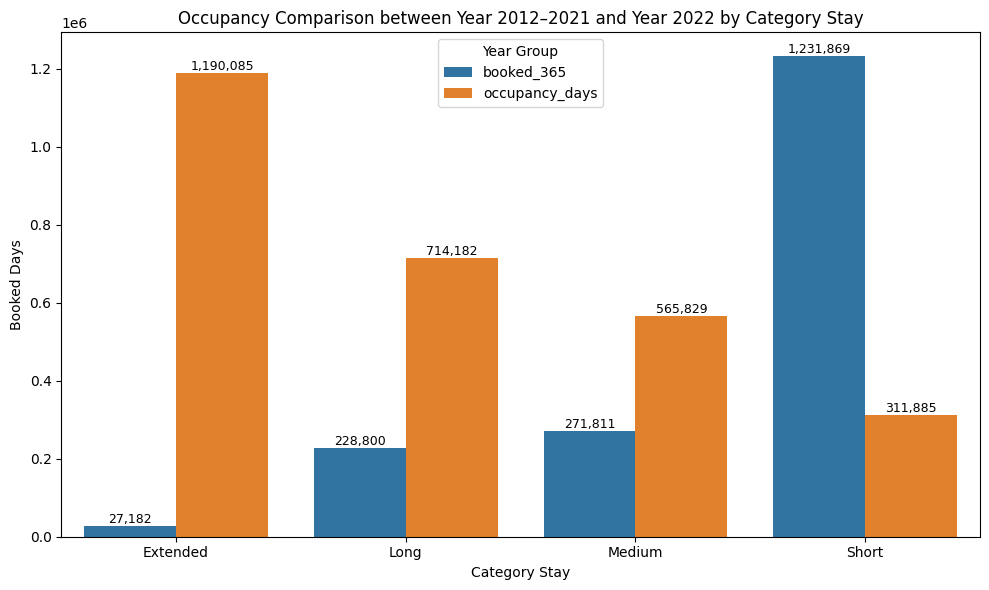

In [145]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=melted,
    x="category_stay",
    y="value",
    hue="year_group",
)
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # avoid 0-height annotations
        plt.gca().annotate(
            f"{int(height):,}",
            (p.get_x() + p.get_width()/2., height),
            ha="center", va="bottom",
            fontsize=9, color="black")

plt.title("Occupancy Comparison between Year 2012–2021 and Year 2022 by Category Stay")
plt.ylabel("Booked Days")
plt.xlabel("Category Stay")
plt.legend(title="Year Group")
plt.tight_layout()
plt.show()

- adanya `trend shift` dari sisi `category stay`, dimana pada tahun `2012-2021`, `extended stay sangat diminati` customer lebih dari `1.2 Million booked days` di ikuti `long stay, medium stay, dan terakhir short stay`.
- sedangkan pada tahun `2022`, trend terjadi `terbalik`, dimana extended stay menjadi pilihan yang paling tidak diminati, dan `short stay` sangat diminati customer yang booking `pada tahun 2022 dengan 1.2 Million booked days`.
- `trend shift ini penting untuk host`, karena semakin banyak host yang mulai `mengubah minimum nights menjadi lebih kecil`, semakin banyak juga `customer memiliki variasi tempat` yang dapat ditinggalkkan selama ada di bangkok untuk vacation. Ini akan `berdampak kepada revenue karena lebih optimal`.

- KPI section:
- Total `Revenue` all years
- `Revenue` each year from 2012-2021
- Total `Unique Listings`
- Total `Unique Host`

In [141]:
df1h = df1e[['price', 'booked_365', 'occupancy_days']]
df1h['revenue2022'] = df1h['price'] * df1h['booked_365']
df1h['revenuebefore'] = df1h['price'] * df1h['occupancy_days']
totalrevenue = df1h['revenue2022'].sum() + df1h['revenuebefore'].sum()
revenueeachyearbefore = df1h['revenuebefore'].sum() / 10
df1e['id'].nunique()
df1e['host_id'].nunique()
print(f'''
      Total Revenue Airbnb Bangkok All Years: {totalrevenue}, 
      Revenue each year from 2012-2021: {revenueeachyearbefore}, 
      Total Unique Listings: {df1e['id'].nunique()}, 
      Total Unique Host: {df1e['host_id'].nunique()}''')


      Total Revenue Airbnb Bangkok All Years: 7099059817, 
      Revenue each year from 2012-2021: 431341271.5, 
      Total Unique Listings: 14442, 
      Total Unique Host: 6191


C:\Users\Ivan\AppData\Local\Temp\ipykernel_26232\136086985.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ivan\AppData\Local\Temp\ipykernel_26232\136086985.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Conclusion
- di tahun 2022 sendiri, revenue airbnb mencapai 2.7 Billion Baht tertinggi dari tahun tahun sebelumnya. 

- 14 wilayah atau neighbour mendominasi dari segi jumlah possible booked days dan juga booked days di tahun 2022 yang berarti semakin banyak listing di daerah tersebut, semakin banyak juga kemungkinan customer memilih daerah tersebut untuk menyewa tempat di bangkok.

- Customer preference kepada entire home/apt sebagai tempat untuk disewa dari tahun 2012-2022 memberikan gambaran bahwa customer yang datang ke bangkok dan ingin vacation sangat senang dengan tipe ini karena memberikan privasi lebih dibandingkan dengan room type lainnya.

- Customer times preference yang terjadi trend shift dari extended stay menjadi short stay dapat dijadikan bahan pembelajaran kepada host bahwa flexibility di minimum-nights adalah prioritas bagi customer.

## Actionable Recommendation
- Airbnb di bangkok masih dapat berkembang dari sisi potensi customer. perkembangan ini bisa lebih di maksimalkan dengan memberikan iklan yang dapat dilihat potential customer dan juga memberikan discount atau bonus untuk customer baru.

- Airbnb dapat memberikan incentive kepada host untuk membuka tempat baru untuk di sewa di daerah yang under-penetrated seperti cut percentage dikurangi sehingga host dapat mendapatkan untung lebih dari revenuenya.

- Airbnb dapat memberikan bonus atau discount untuk customer yang memilih room type lain selain entire home/apt atau bahkan memberikan sugesti kepada host baru untuk menyewakan tempat dengan tipe 1 rumah sekaligus dan tidak menyarankan bentuk/ tipe ruangan lainnya untuk disewakan berdasarkan customer behaviour ketika memilih tempat untuk ditinggali berdasarkan tipe ruangan.

- Airbnb dapat memberikan nasihat kepada host untuk mengurangi minimum night to book supaya listing yang host sewa memiliki kesempatan yang lebih besar untuk dipilih dan disewa customer. Atau kalau host sulit melakukan hal tersebut, Airbnb dapat memberikan customer discount ketika menyewa tempat dengan minimum nights tinggi atau lebih lama menempati tempat tersebut.